In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

plt.rc('font', family='Malgun Gothic')


In [19]:
url='https://sports.news.naver.com/kbaseball/record/index?category=kbo&year='

In [20]:
df=pd.DataFrame([])

In [21]:
for i in range(2012, 2022+1):
    df1=pd.read_html(url+str(i))[0]
    df1["연도"]=str(i)
    df=pd.concat([df, df1])

In [26]:
df=df.replace({"kt":"KT", "SK":"SSG", "넥센":"키움"})
df

,순위,팀,경기수,승,패,무,승률,게임차,연속,출루율,장타율,최근 10경기,연도
0,1,삼성,133,80,51,2,0.611,0.0,1승,0.353,0.389,6승-4패-0무,2012
1,2,SSG,133,71,59,3,0.546,8.5,1승,0.333,0.384,4승-6패-0무,2012
2,3,두산,133,68,62,3,0.523,11.5,1패,0.322,0.352,4승-6패-0무,2012
3,4,롯데,133,65,62,6,0.512,13.0,1패,0.326,0.364,5승-5패-0무,2012
4,5,KIA,133,62,65,6,0.488,16.0,1패,0.343,0.347,7승-3패-0무,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,6,NC,144,67,74,3,0.475,21.5,1패,0.334,0.375,6승-4패-0무,2022
6,7,삼성,144,66,76,2,0.465,23.0,2승,0.334,0.387,6승-4패-0무,2022
7,8,롯데,144,64,76,4,0.457,24.0,1승,0.328,0.383,5승-5패-0무,2022
8,9,두산,144,60,82,2,0.423,29.0,2패,0.324,0.365,4승-6패-0무,2022


pivot() : 두개의 열을 기준으로 행가 열을 재구성
pivot_table : 데이터 집계함수를 사용(데이터 프레임 응용)

In [28]:
df_pivot1 = df.pivot(index="연도", columns='팀', values='순위')
df_pivot1 = df_pivot1.fillna(0)
df_pivot1 = df_pivot1.astype(int)
df_pivot1

팀,KIA,KT,LG,NC,SSG,두산,롯데,삼성,키움,한화
연도,,,,,,,,,,
2012,5,0,7,0,2,3,4,1,6,8
2013,8,0,3,7,6,2,5,1,4,9
2014,8,0,4,3,5,6,7,1,2,9
2015,7,10,9,3,5,1,8,2,4,6
2016,5,10,4,2,6,1,8,9,3,7
2017,1,10,6,4,5,2,3,9,7,8
2018,5,9,8,10,1,2,7,6,4,3
2019,7,6,4,5,3,1,10,8,2,9
2020,6,3,4,1,9,2,7,8,5,10


In [29]:
df_pivot2 = df.pivot(index="연도", columns='순위', values='팀')
# df_pivot2 = df_pivot2.fillna(0)
# df_pivot2 = df_pivot2.astype(int)
df_pivot2

순위,1,2,3,4,5,6,7,8,9,10
연도,,,,,,,,,,
2012,삼성,SSG,두산,롯데,KIA,키움,LG,한화,NaN,NaN
2013,삼성,두산,LG,키움,롯데,SSG,NC,KIA,한화,NaN
2014,삼성,키움,NC,LG,SSG,두산,롯데,KIA,한화,NaN
2015,두산,삼성,NC,키움,SSG,한화,KIA,롯데,LG,KT
2016,두산,NC,키움,LG,KIA,SSG,한화,롯데,삼성,KT
2017,KIA,두산,롯데,NC,SSG,LG,키움,한화,삼성,KT
2018,SSG,두산,한화,키움,KIA,삼성,롯데,LG,KT,NC
2019,두산,키움,SSG,LG,NC,KT,KIA,삼성,한화,롯데
2020,NC,두산,KT,LG,키움,KIA,롯데,삼성,SSG,한화


In [30]:
df_pivot3 = df.pivot(index="연도", columns='팀', values='승률')
df_pivot3

팀,KIA,KT,LG,NC,SSG,두산,롯데,삼성,키움,한화
연도,,,,,,,,,,
2012,0.488,NaN,0.442,NaN,0.546,0.523,0.512,0.611,0.469,0.408
2013,0.408,NaN,0.578,0.419,0.496,0.568,0.532,0.595,0.571,0.331
2014,0.422,NaN,0.492,0.551,0.484,0.465,0.457,0.624,0.619,0.389
2015,0.465,0.364,0.451,0.596,0.486,0.549,0.462,0.611,0.545,0.472
2016,0.490,0.373,0.500,0.589,0.479,0.650,0.458,0.455,0.538,0.468
2017,0.608,0.347,0.489,0.560,0.524,0.596,0.563,0.396,0.486,0.430
2018,0.486,0.418,0.476,0.406,0.545,0.646,0.479,0.486,0.521,0.535
2019,0.437,0.500,0.552,0.514,0.615,0.615,0.340,0.420,0.601,0.403
2020,0.507,0.566,0.564,0.601,0.357,0.564,0.497,0.460,0.559,0.326


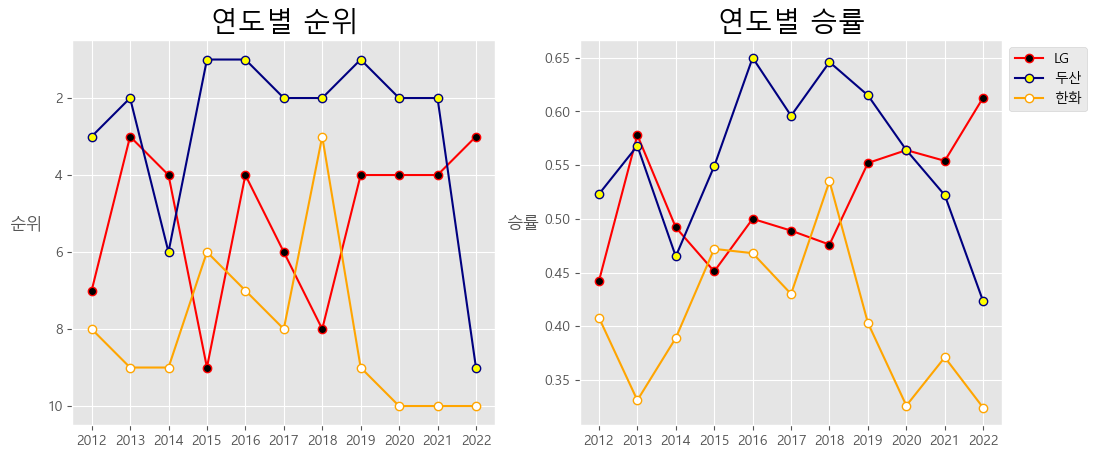

In [62]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(12, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

# ax1.plot(df_pivot1.index, df_pivot1['LG'], marker='o', color="red", markerfacecolor="black", label='LG')
# ax1.plot(df_pivot1.index, df_pivot1['두산'], marker='o', color="navy", markerfacecolor="yellow", label='두산')
# ax1.plot(df_pivot1.index, df_pivot1['한화'], marker='o', color="orange", markerfacecolor="white", label='한화')
# ax1.set_ylim(10.5, 0.5) # 낮은 등위가 아래로
# ax1.legend(loc='best')

# ax2.plot(df_pivot3.index, df_pivot3['LG'], marker='o', color="red", markerfacecolor="black", label='LG')
# ax2.plot(df_pivot3.index, df_pivot3['두산'], marker='o', color="navy", markerfacecolor="yellow", label='두산')
# ax2.plot(df_pivot3.index, df_pivot3['한화'], marker='o', color="orange", markerfacecolor="white", label='한화')
# ax2.set_ylim(0.0, 0.8)
# ax2.legend(loc='best')

data = {'team': ['LG', '두산', '한화'],
        'marker_color': ['red', 'navy', 'orange'],
        'face_color': ['black', 'yellow', 'white']}

df_three_team = pd.DataFrame(data)
for team, marker_color, face_color in zip(df_three_team['team'], df_three_team['marker_color'], df_three_team['face_color']):
    ax1.plot(df_pivot1.index, df_pivot1[team], marker='o', color=marker_color, markerfacecolor=face_color)
    ax2.plot(df_pivot3.index, df_pivot3[team], marker='o', color=marker_color, markerfacecolor=face_color, label=team)
    
ax1.set_ylim(10.5, 0.5) # 낮은 등위가 아래로
ax2.legend(bbox_to_anchor=(1,1))
ax1.set_title("연도별 순위", size=20)
ax2.set_title("연도별 승률", size=20)
ax1.set_ylabel('순위', rotation=0, labelpad=15)
ax2.set_ylabel('승률', rotation=0, labelpad=15)


plt.show()
